Importing the dependencies

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


**Task-1:Converting from colour to grayscale without function**

Enter the path of the image:/content/sample_data/MainAfter.webp


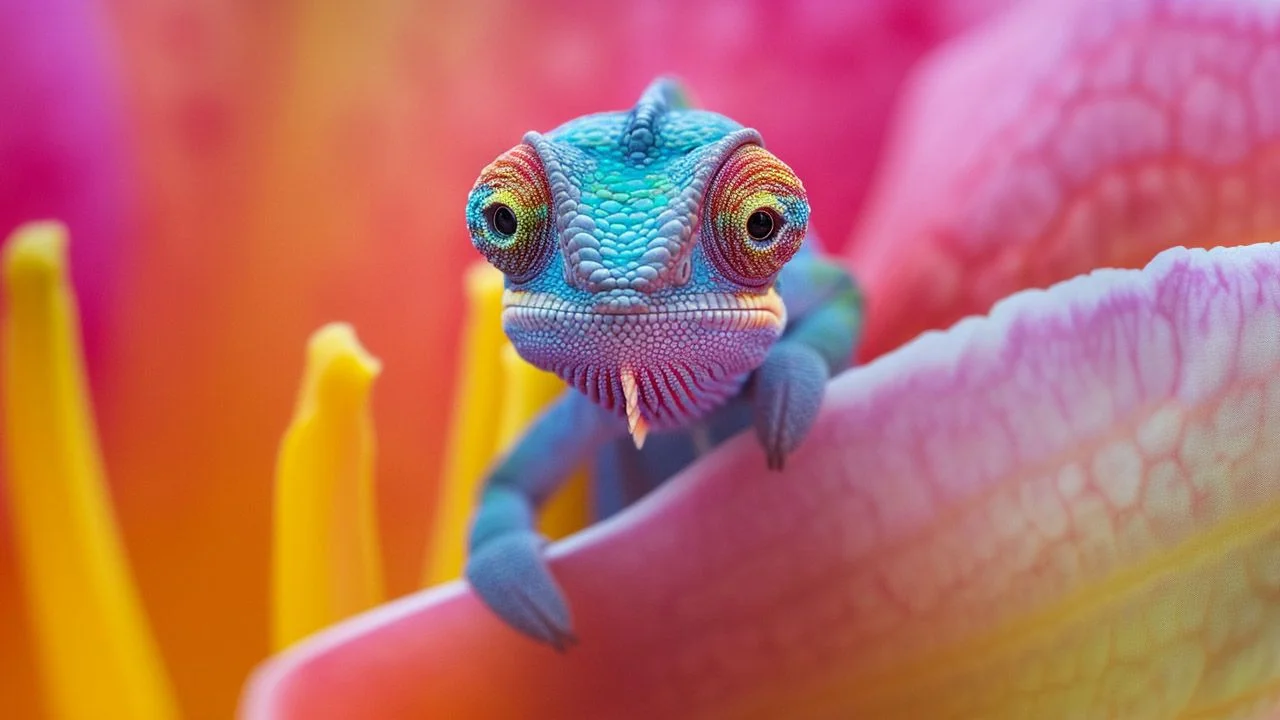

<ipython-input-9-38b73c1fb400>:15: RuntimeWarning: overflow encountered in scalar add
  updated_row.append((pixel[0]+pixel[1]+pixel[2])/3)


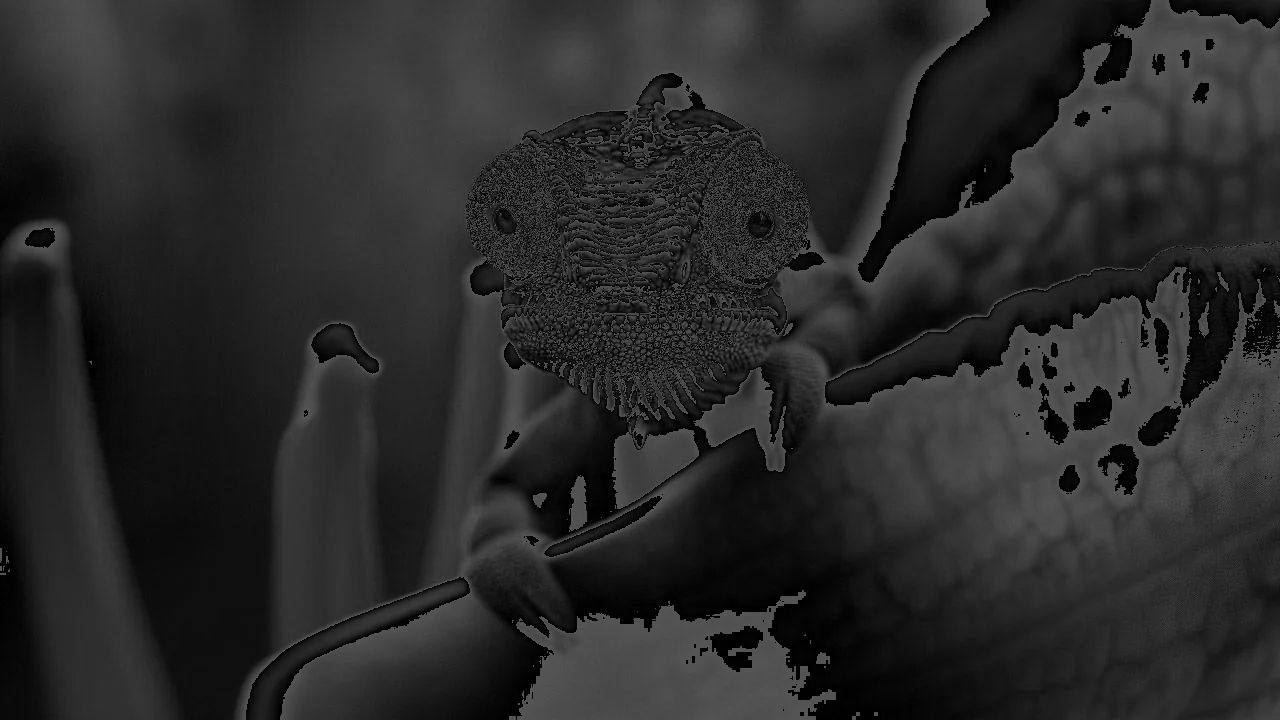

In [ ]:
input_image_path=input("Enter the path of the image:")
normal_image=cv2.imread(input_image_path)
normal_image.shape

cv2_imshow(normal_image)

grayscale1=[]
for row in normal_image:
  updated_row=[]
  for pixel in row:
    updated_row.append((pixel[0]+pixel[1]+pixel[2])/3)
  grayscale1.append(updated_row)

grayscale=np.array(grayscale1)
cv2_imshow(grayscale)

**Task-2&&3:Doubling and halfing the dimensions of the original image**

Enter the path of the image/content/sample_data/MainAfter.webp


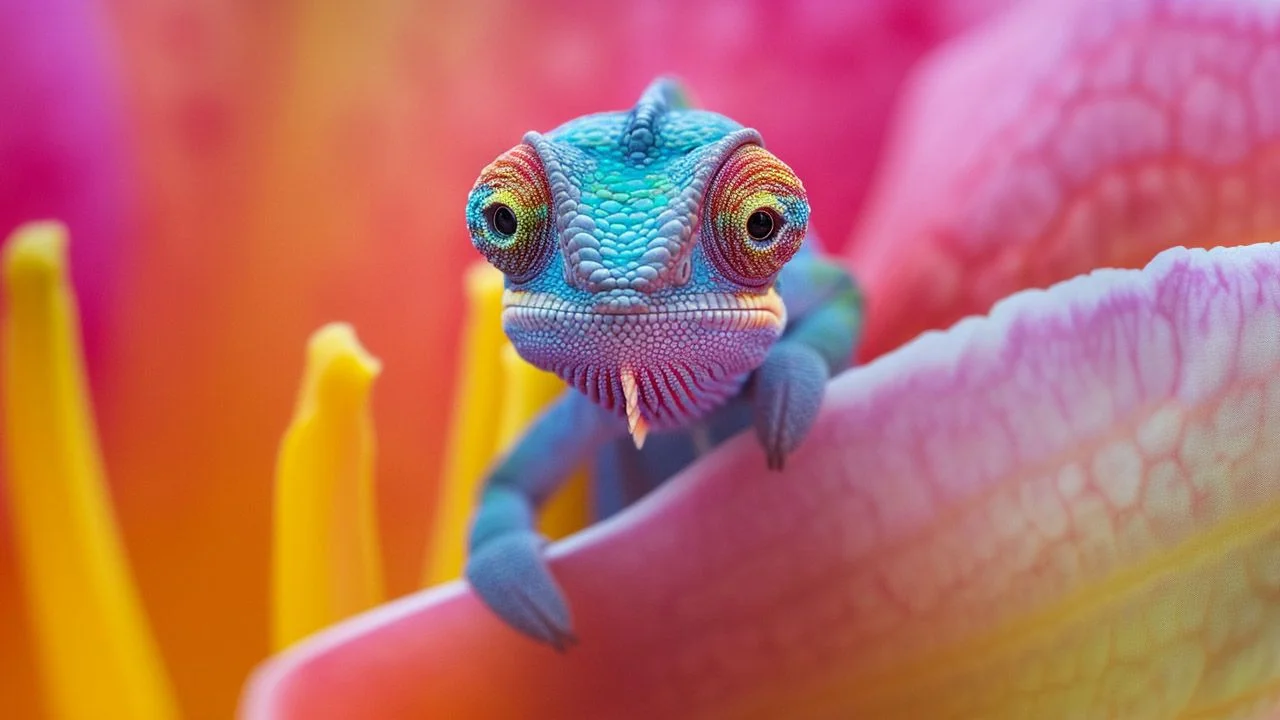

The dimensions of the above image are (720, 1280, 3)
The Dimensions of the bigger image are: (1440, 2560, 3)
The Bigger Image


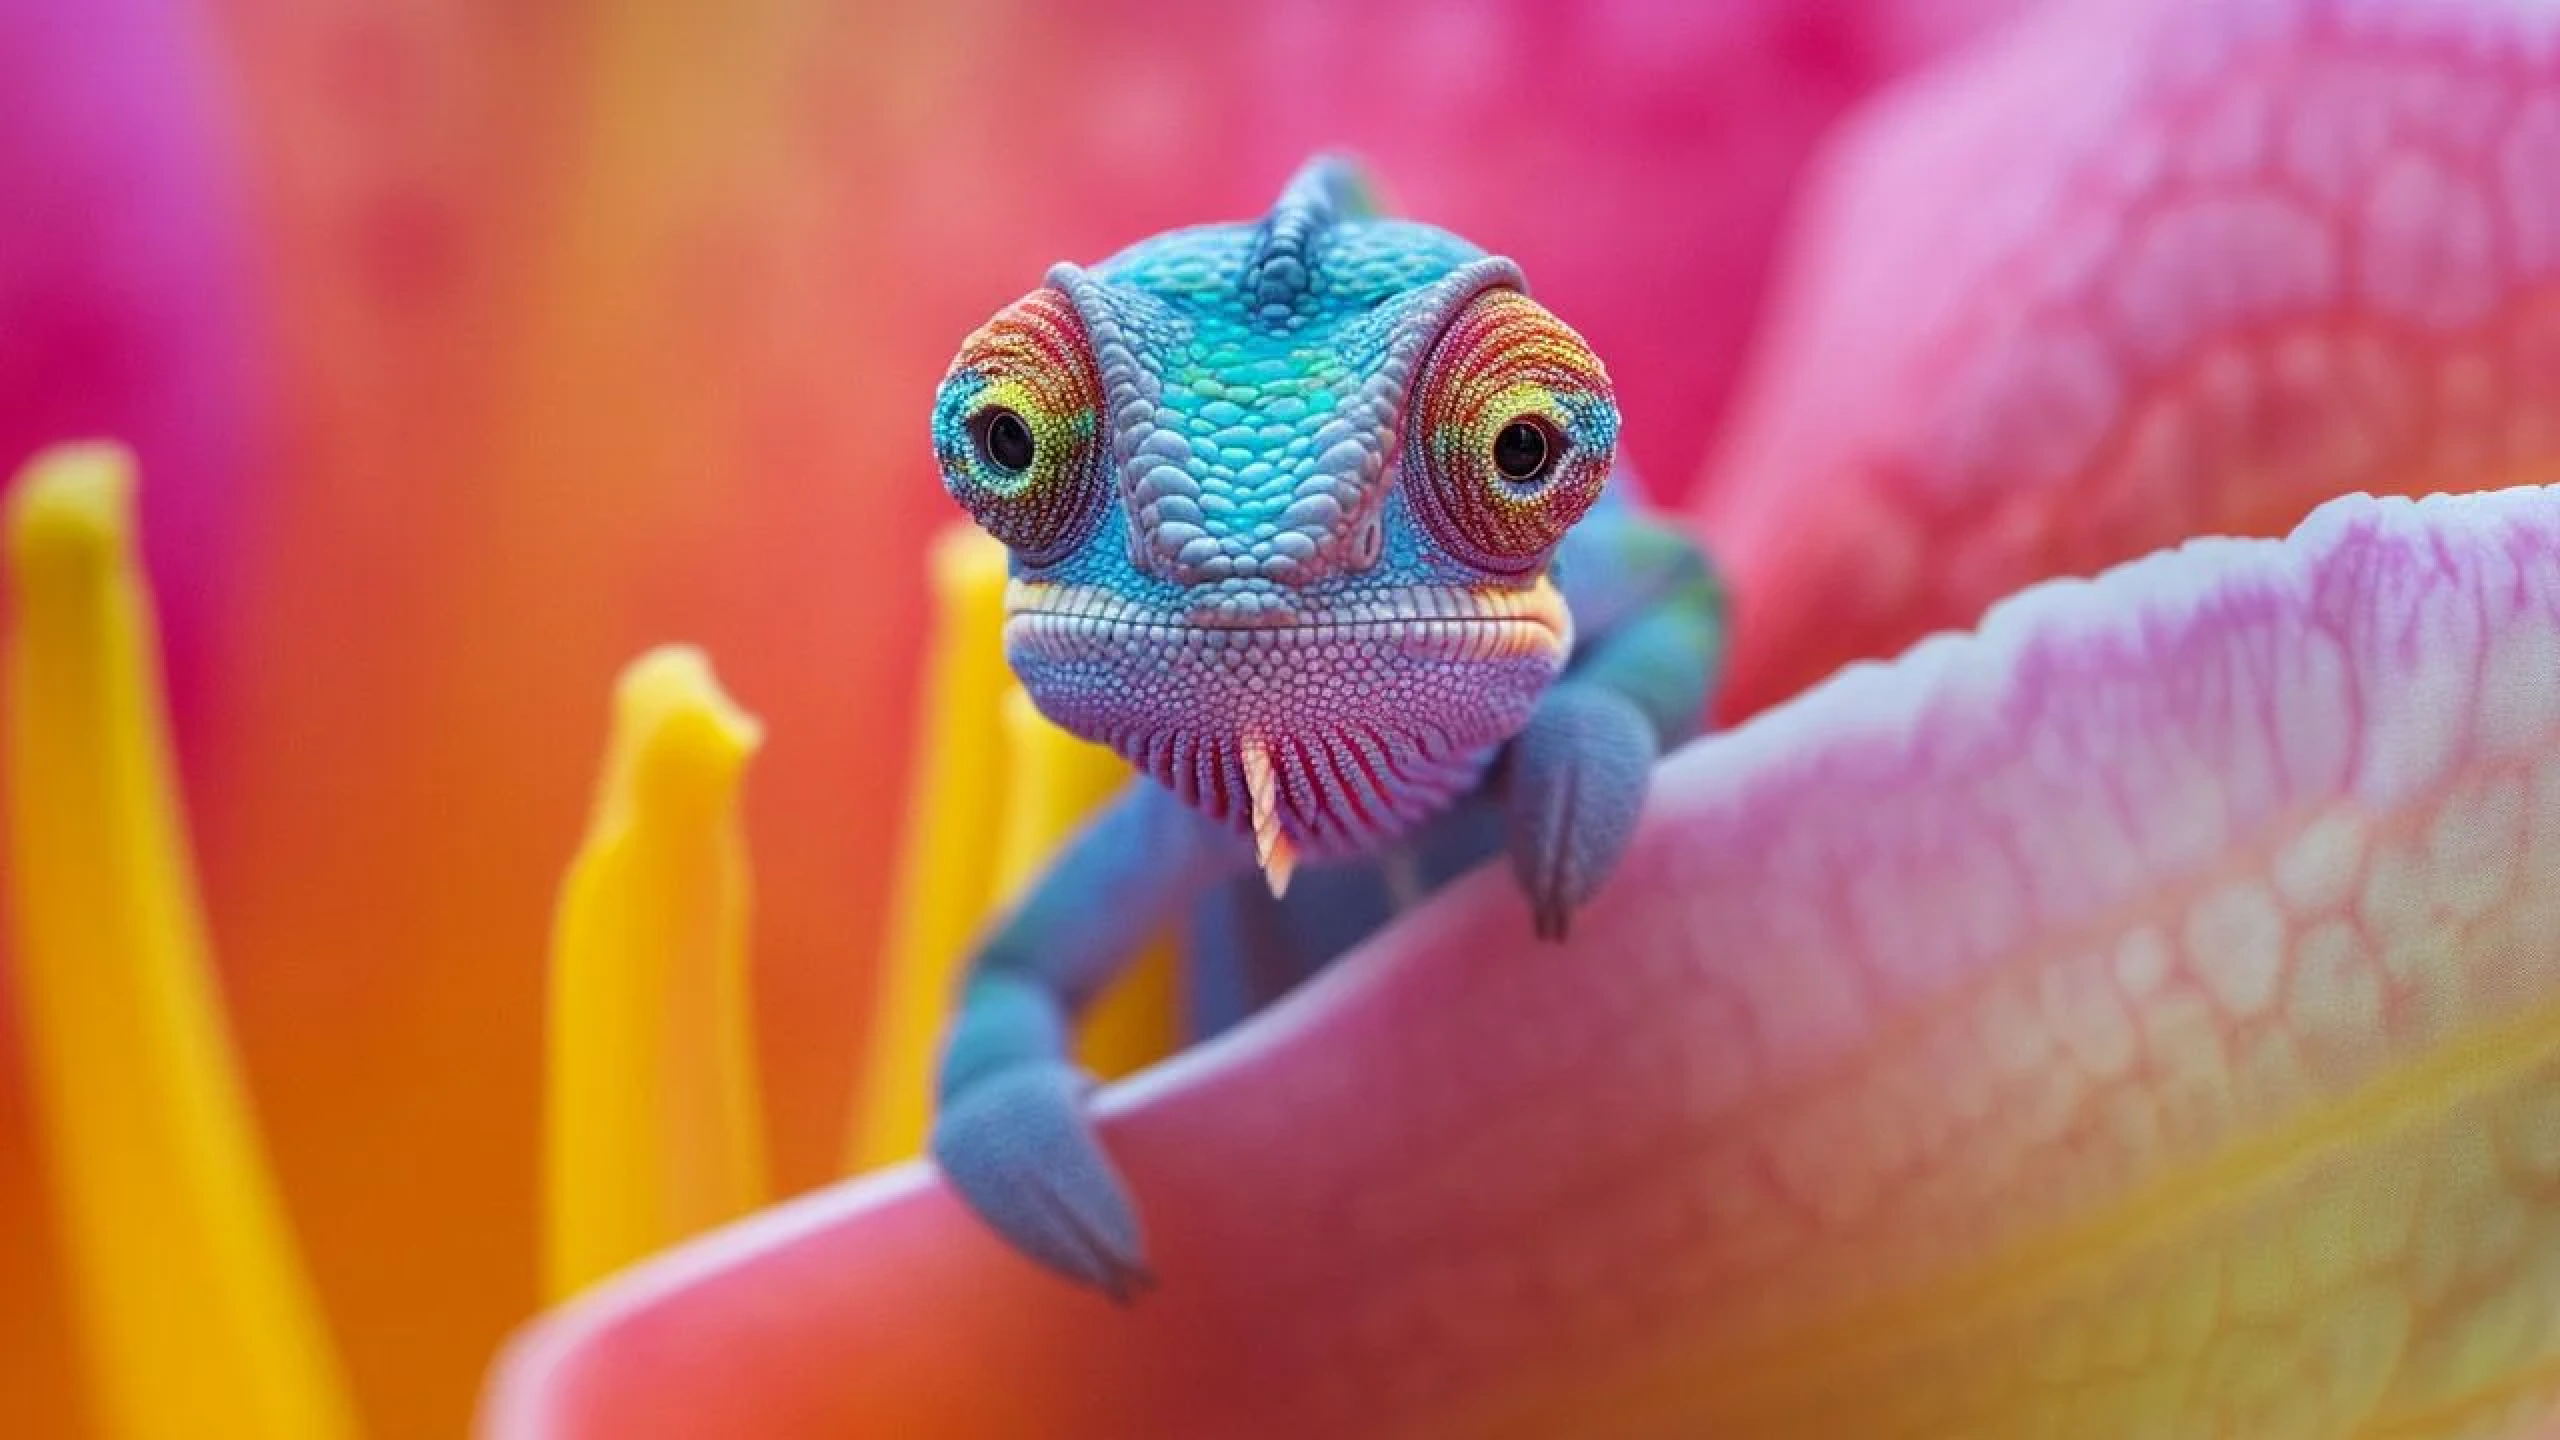

The dimensions of the smaller image are: (360, 640, 3)
The Smaller Image


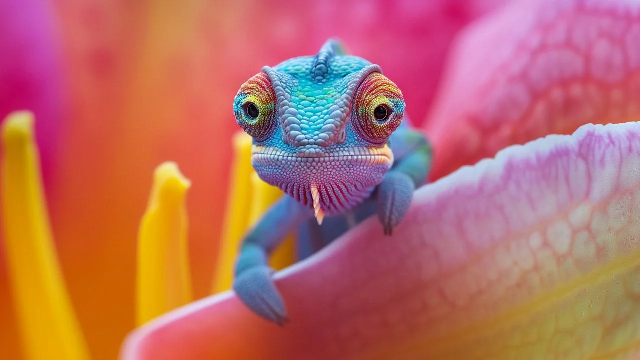

In [ ]:
input_image_path=input("Enter the path of the image")
real_image=cv2.imread(input_image_path)

cv2_imshow(real_image)
print("The dimensions of the above image are",real_image.shape)

smaller_image=[]
bigger_image=[]

#First taking care of the bigger image
for row in real_image:
  updated_row=[]
  for pixel in row:
    updated_row.append(pixel)
    updated_row.append(pixel)
  bigger_image.append(updated_row)
  bigger_image.append(updated_row)

bigger_image=np.array(bigger_image)
print("The Dimensions of the bigger image are:",bigger_image.shape)
print("The Bigger Image")
cv2_imshow(bigger_image)

#Now taking care of the smaller image
for row in range(0,real_image.shape[0],2):
  updated_row2=[]
  for pixel in range(0,real_image.shape[1],2):
    updated_row2.append(real_image[row][pixel])
  smaller_image.append(updated_row2)

smaller_image=np.array(smaller_image)
print("The dimensions of the smaller image are:",smaller_image.shape)

print("The Smaller Image")
cv2_imshow(smaller_image)



**Task-4:Applying filter and changing the most of the pixels**

Enter the path of the image:/content/drive/MyDrive/Colab Notebooks/Data/Chameleon.webp


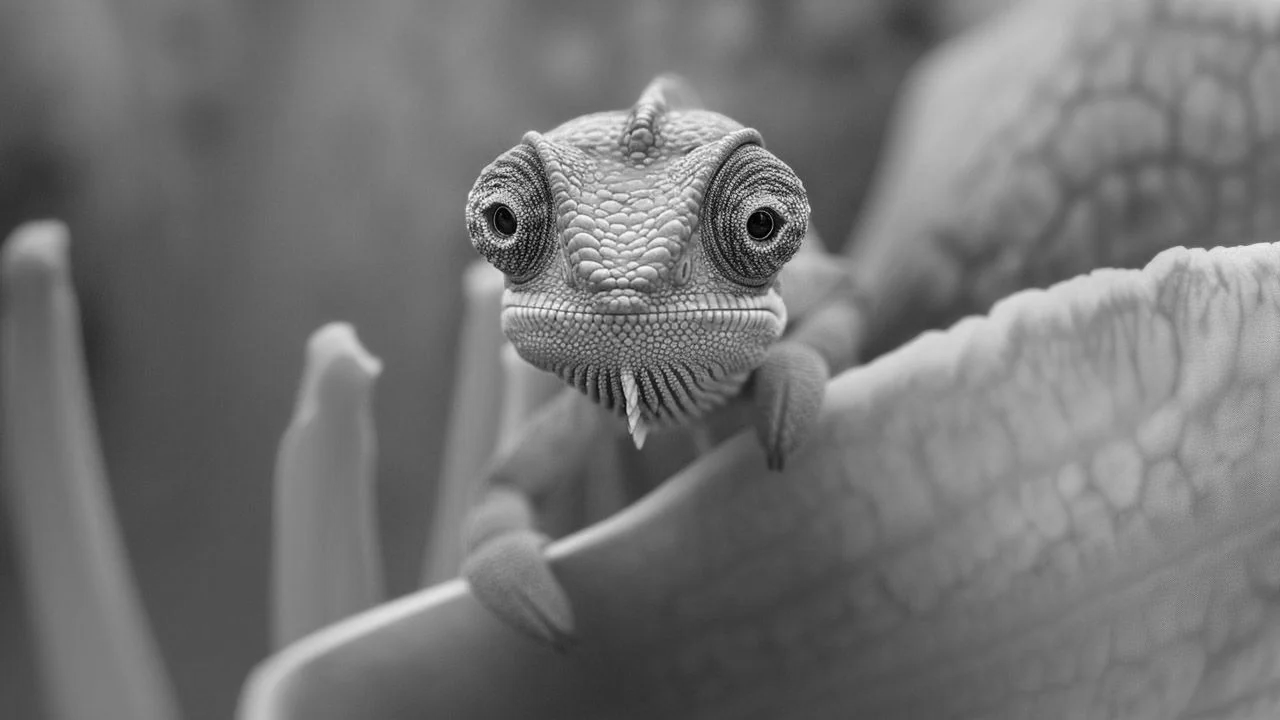

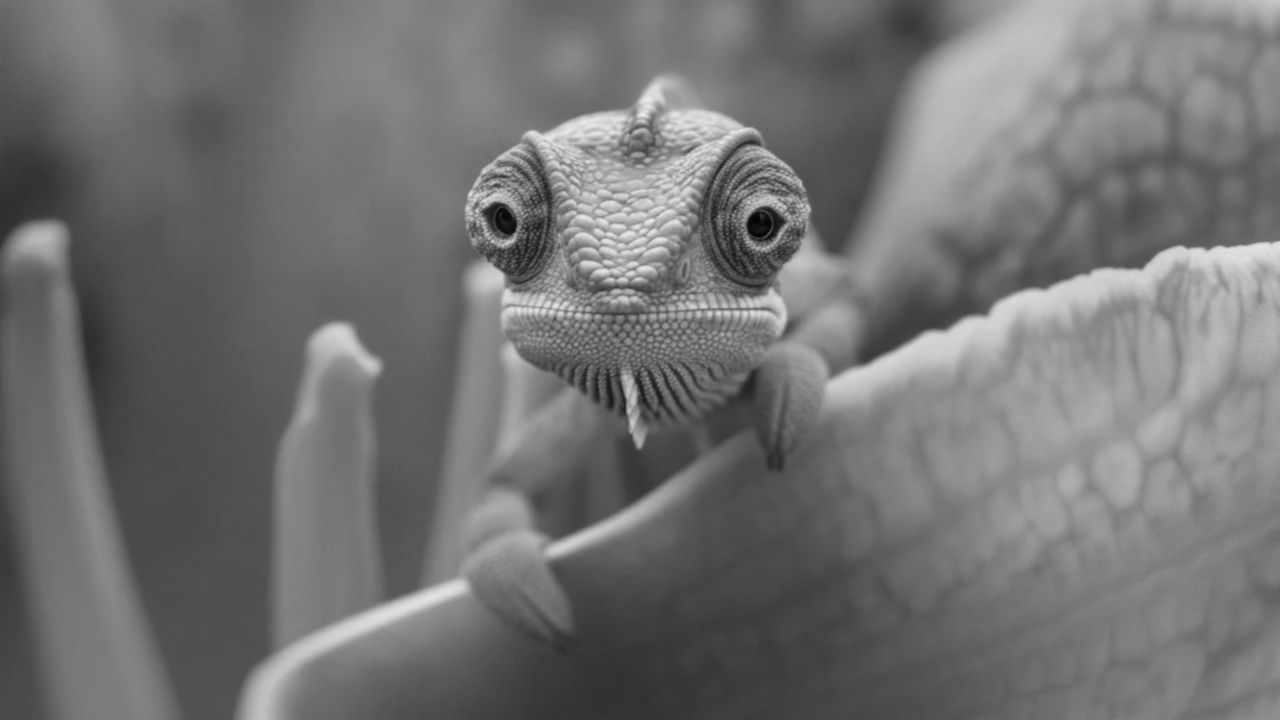

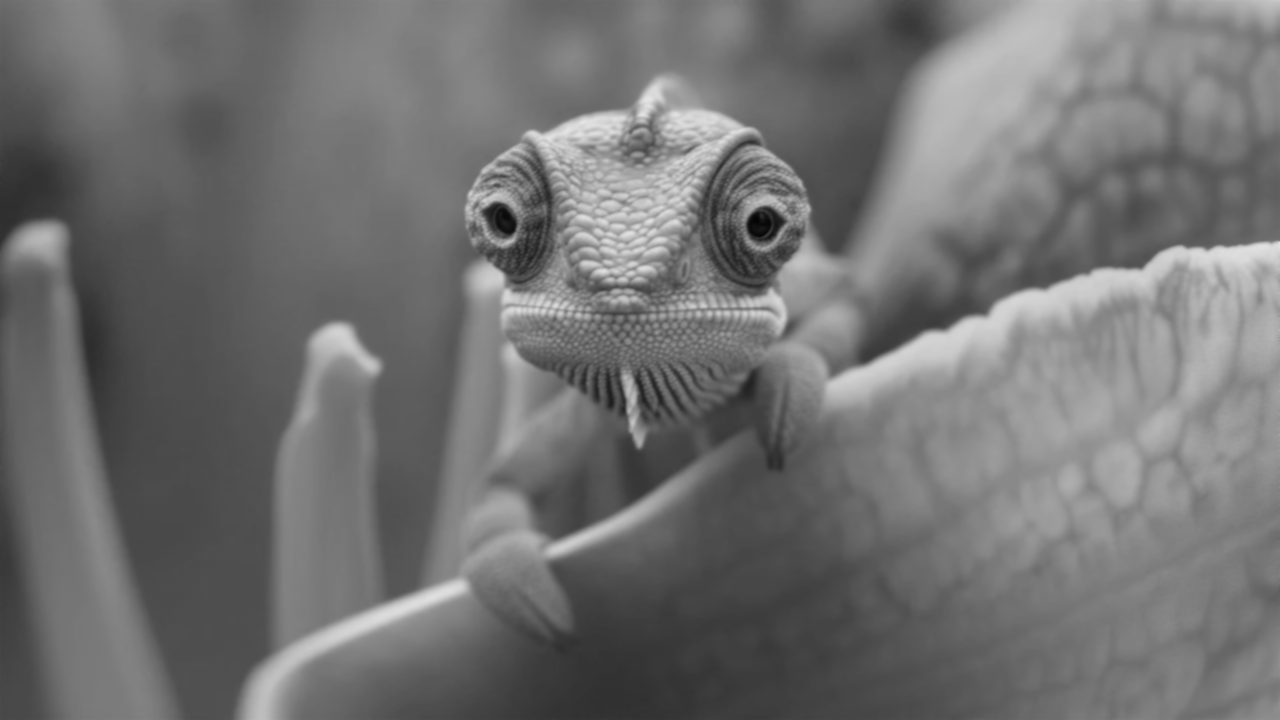

In [ ]:
input_image_path=input("Enter the path of the image:")
real_image=cv2.imread(input_image_path)

grayscale=cv2.cvtColor(real_image,cv2.COLOR_RGB2GRAY)
filter=np.ones((3,3))
filter=filter/9

cv2_imshow(grayscale)
filtered_image=grayscale
# sub_image=grayscale[1-1:1+2,1-1:1+2]
# print("The shape of the sub_image is ",sub_image.shape)
# cv2_imshow(sub_image)
for row in range(1,grayscale.shape[0]-1):
  for pixel in range(1,grayscale.shape[1]-1):
    sub_image=grayscale[row-1:row+2,pixel-1:pixel+2]
    sub_image=sub_image*filter
    sum1=0
    for i in sub_image:
      for j in i:
        sum1+=j

    new_pixel_value=sum1
    # print("The sum of the sub image is ",new_pixel_value)
    filtered_image[row][pixel]=new_pixel_value

cv2_imshow(filtered_image)

#Second Iteration
filtered_image2=filtered_image
for row in range(1,grayscale.shape[0]-1):
  for pixel in range(1,grayscale.shape[1]-1):
    sub_image=grayscale[row-1:row+2,pixel-1:pixel+2]
    sub_image=sub_image*filter
    sum1=0
    for i in sub_image:
      for j in i:
        sum1+=j

    new_pixel_value=sum1
    # print("The sum of the sub image is ",new_pixel_value)
    filtered_image2[row][pixel]=new_pixel_value

cv2_imshow(filtered_image2)




**Extra Filters**

Enter the path of the image:/content/drive/MyDrive/Colab Notebooks/Data/images.png


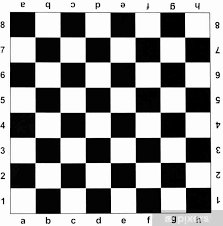

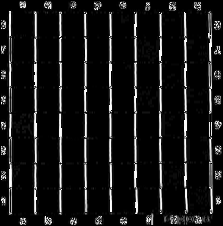

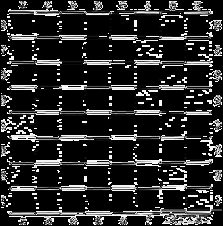

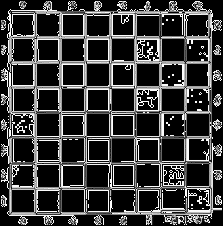

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = input("Enter the path of the image:")

original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
new_image = np.zeros_like(original_image)

#Prewitt Filter
filter = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

rows, cols = original_image.shape

for i in range(1, len(original_image)-1):
    for j in range(1, len(original_image[0])-1):
        temp = original_image[i-1:i+2, j-1:j+2]
        sum = abs(np.sum(temp * filter))
        new_image[i, j] = sum

cv2_imshow(original_image)
cv2_imshow(new_image)

#Sobel Filter
filter = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

for i in range(1, len(original_image)-1):
    for j in range(1, len(original_image[0])-1):
        temp = original_image[i-1:i+2, j-1:j+2]
        sum = np.sum(temp * filter)
        new_image[i, j] = sum

cv2_imshow(new_image)

#Laplacian Filter
filter = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

for i in range(1, len(original_image)-1):
    for j in range(1, len(original_image[0])-1):
        temp = original_image[i-1:i+2, j-1:j+2]
        sum = np.sum(temp * filter)
        new_image[i, j] = sum

cv2_imshow(new_image)